##### <h2><b>Лабораторна робота №1</b> </h2> Зінов'єв Андрій, гр. ФБ-42мп


<b>Частина 1 - KNN:</b> Імпортування бібліотек, датасету. Використовувався датасет - https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_main = pd.read_csv("breast-cancer.csv").drop('id', axis=1)

column_to_drop = ['compactness_se', 'concavity_se', 'area_worst', 'radius_mean', 'concavity_worst', 'radius_worst', 'concavity_mean', 'compactness_mean', 'area_mean', 'area_se']
df_main = df_main.drop(columns=column_to_drop, axis=1)

#  обробка датасету (переведення тексту стовпця в числа)
label_encoder = preprocessing.LabelEncoder()
df_main['diagnosis'] = label_encoder.fit_transform(df_main['diagnosis'])

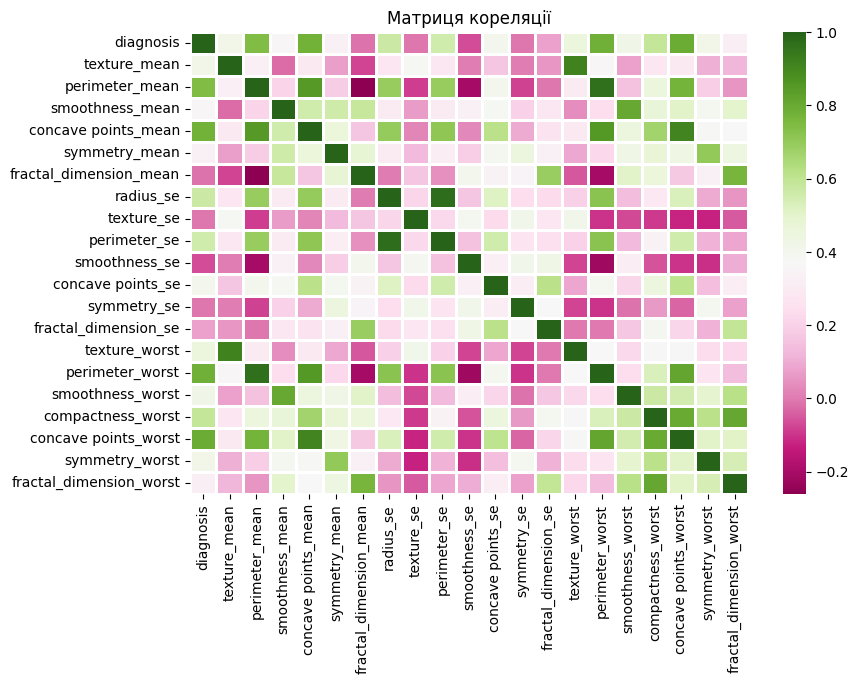

In [64]:
#  матриця кореляції - переглянемо залежності величин між собою
plt.figure(figsize=(9, 6))
sns.heatmap(df_main.corr(), cmap='PiYG', linewidths=1)
plt.title('Матриця кореляції')
plt.show()  

In [65]:
#  визначаємо дані
X = df_main.drop('diagnosis', axis=1)
y = df_main['diagnosis'].values.reshape(-1)

In [66]:
#  розділяємо на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [67]:


knn = KNeighborsClassifier(n_neighbors=3)

# Навчаємо модель 
knn.fit(X_train, y_train)

# Отримуємо змінні за допомогою моделі
y_pred = knn.predict(X_test)

# Виводимо classification report
print('Звіт класифікації:')
print(classification_report(y_test, y_pred))

# Отримуємо confusion matrix
print('Матриця помилок:')
print(confusion_matrix(y_test, y_pred))


Звіт класифікації:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       187
           1       0.97      0.94      0.95        98

    accuracy                           0.97       285
   macro avg       0.97      0.96      0.96       285
weighted avg       0.97      0.97      0.97       285

Матриця помилок:
[[184   3]
 [  6  92]]


<b>Частина 2 - Дерево ухвалення рішень</b>

In [68]:
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
import numpy as np

In [69]:
#  розділяємо на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=69)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
height = 20  # максимальна висота дерева (для даного датасету)

# створюємо класифікатор
clf = DecisionTreeClassifier(criterion='entropy', max_depth=height, min_samples_leaf=1)

# тренеруємо та отримуємо передбачені значення
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(f"Точність дерева: {accuracy_score(y_test, y_predict)}")
print(f"Звіт класифікації:\n{classification_report(y_test, y_predict)}")
print(f"Матриця помилок:\n{confusion_matrix(y_test, y_predict)}")

Точність дерева: 0.9263157894736842
Звіт класифікації:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       170
           1       0.94      0.87      0.90       115

    accuracy                           0.93       285
   macro avg       0.93      0.92      0.92       285
weighted avg       0.93      0.93      0.93       285

Матриця помилок:
[[164   6]
 [ 15 100]]


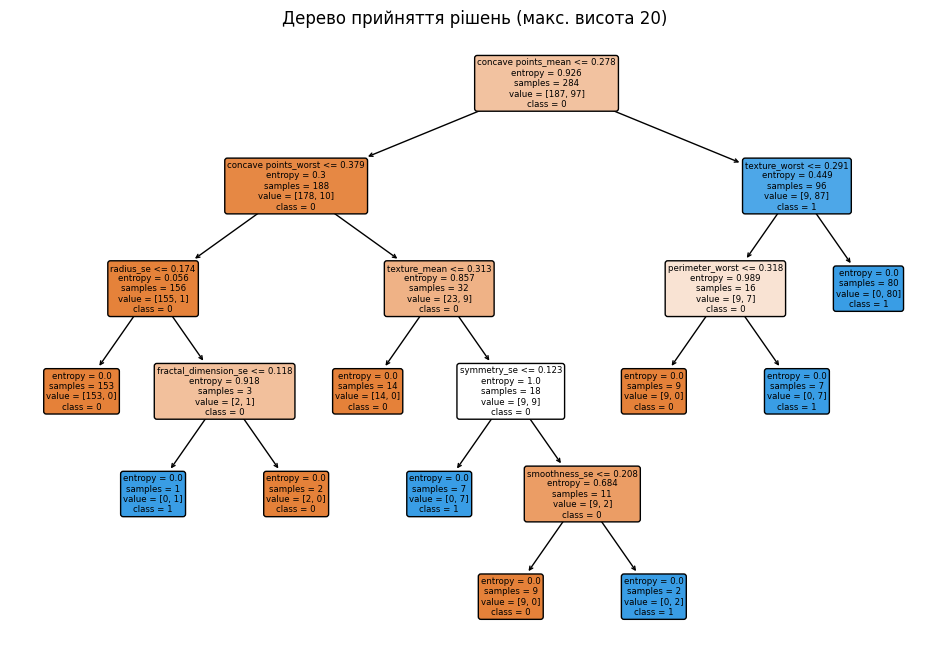

In [71]:
# Візуалізація дерева рішень
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title(f'Дерево прийняття рішень (макс. висота {height})')
plt.show()

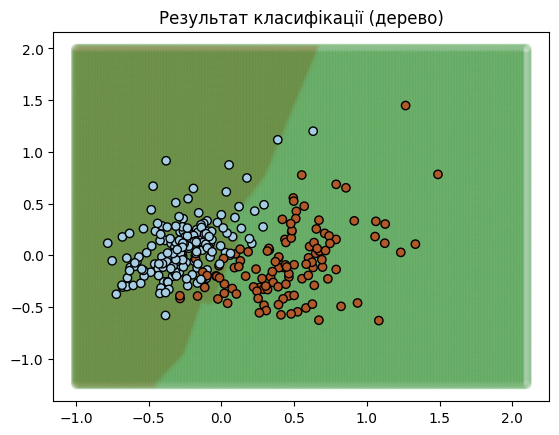

In [72]:
#  за допомогою PCA понижуємо розмірність таблиці до 2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)
x_pca_test = pca.transform(X_test)

#  створюємо площину (сітку) майбутнього графіку
plane = []
for i in np.linspace(-1, 2.1, 300):
    for j in np.linspace(-1.25, 2, 300):
        plane.append([i, j])
plane = np.array(plane)

#  підвищуємо до початкової розмірності
pca_inv = pca.inverse_transform(plane)
y_predict = clf.predict(pca_inv)

#  будуємо графік
plt.scatter(plane[:, 0], plane[:, 1], c=y_predict, edgecolors='green', cmap=plt.cm.Pastel1, alpha=0.1)
plt.scatter(x_pca_test[:, 0], x_pca_test[:, 1], c=y_test, edgecolors='black', cmap=plt.cm.Paired)
plt.title('Результат класифікації (дерево)')
plt.show()

<b>Частина 3 - SVM</b>

In [73]:
#  навчальні та тренувальні дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=69)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
from sklearn.svm import SVC

#  зміна параметрів класифікації та аналіз
gamma_list = np.arange(0.25, 10.0, 0.25).tolist()
kernel_list = ['linear', 'poly', 'rbf']

acc_gamma_result = []
acc_kernel_result = []
acc_c_result = []

for i in range(len(gamma_list)):
    svc_model = SVC(gamma=float(gamma_list[i]))
    svc_model.fit(X_train, y_train)
    y_test_pred = svc_model.predict(X_test)
    acc_gamma_result.append(accuracy_score(y_test, y_test_pred))

for i in range(len(kernel_list)):
    svc_model = SVC(kernel=kernel_list[i])
    svc_model.fit(X_train, y_train)
    y_test_pred = svc_model.predict(X_test)
    acc_kernel_result.append(accuracy_score(y_test, y_test_pred))

for i in range(len(c_list)):
    svc_model = SVC(C=float(c_list[i]))
    svc_model.fit(X_train, y_train)
    y_test_pred = svc_model.predict(X_test)
    acc_c_result.append(accuracy_score(y_test, y_test_pred))

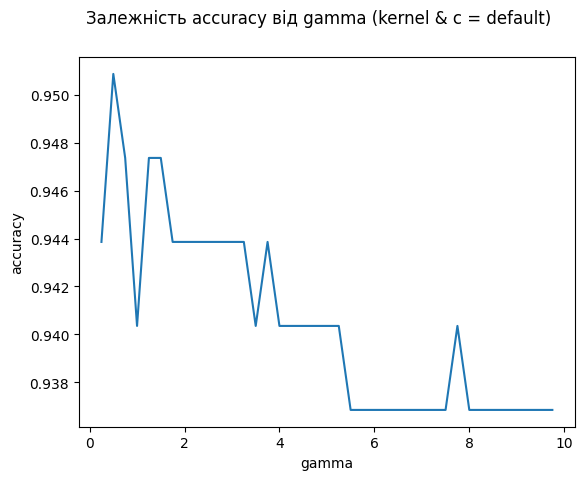

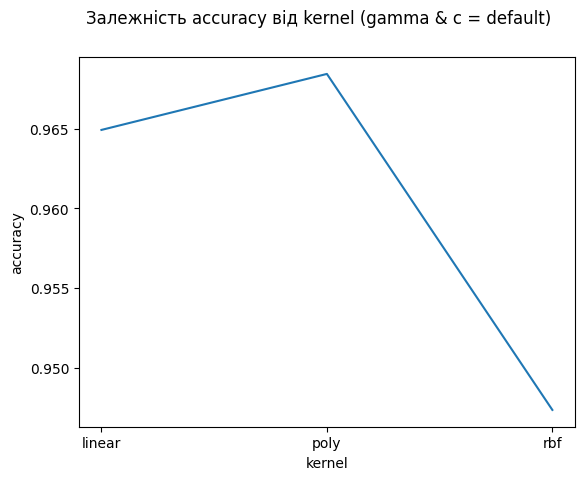

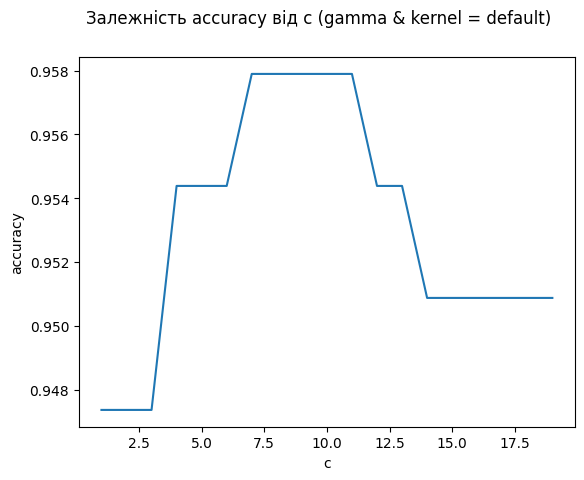

In [75]:
plt.plot(gamma_list, acc_gamma_result)
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.suptitle('Залежність accuracy від gamma (kernel & c = default)')
plt.show()

plt.plot(kernel_list, acc_kernel_result)
plt.xlabel('kernel')
plt.ylabel('accuracy')
plt.suptitle('Залежність accuracy від kernel (gamma & c = default)')
plt.show()

plt.plot(c_list, acc_c_result)
plt.xlabel('с')
plt.ylabel('accuracy')
plt.suptitle('Залежність accuracy від c (gamma & kernel = default)')
plt.show()

In [76]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#  вказуємо параметри та знаходимо такі, що визначають кращу точність моделі
param_grid = {'gamma': [0.25, 0.5, 1, 2], 'C': range(1, 20), 'kernel': ['linear', 'poly', 'rbf']}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Кращі параметри: gamma = {best_params['gamma']}, kernel = {best_params['kernel']}, C = {best_params['C']}")
print(f"Точність: {accuracy_score(y_test, y_test_pred)}")

Кращі параметри: gamma = 0.25, kernel = rbf, C = 2
Точність: 0.9508771929824561


In [77]:
#  ініціалізація моделі на кращих параметрах та тренування
svc_model = SVC(gamma=best_params['gamma'], kernel=best_params['kernel'], C=best_params['C'])
svc_model.fit(X_train, y_train)

#  вгадані дані та матриця помилок
y_test_pred = svc_model.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print(f"\nМатриця помилок (тестові дані):\n {conf_matrix_test}\n")
print(f"Звіт класифікації:\n{classification_report(y_test, y_test_pred)}")


Матриця помилок (тестові дані):
 [[170   0]
 [ 12 103]]

Звіт класифікації:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       170
           1       1.00      0.90      0.94       115

    accuracy                           0.96       285
   macro avg       0.97      0.95      0.96       285
weighted avg       0.96      0.96      0.96       285



In [78]:
#  за допомогою PCA понижуємо розмірність таблиці до 2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)
x_pca_test = pca.transform(X_test)

#  створюємо площину (сітку) майбутнього графіку
plane = []
for i in np.linspace(-1, 2.1, 300):
    for j in np.linspace(-1, 2.5, 300):
        plane.append([i, j])
plane = np.array(plane)

#  підвищуємо до початкової розмірності
pca_inv = pca.inverse_transform(plane)
y_predict = svc_model.predict(pca_inv)

#  будуємо графік
plt.scatter(plane[:, 0], plane[:, 1], c=y_predict, edgecolors='green', cmap='ocean', alpha=0.1)
plt.scatter(x_pca_test[:, 0], x_pca_test[:, 1], c=y_test, edgecolors='black', cmap=plt.cm.Paired)
plt.title(f"Результат класифікації ({best_params['kernel']} kernel)")
plt.show()

In [62]:
for kernel in kernel_list:
    svc_model = SVC(gamma=best_params['gamma'], kernel=kernel, C=best_params['C'])
    svc_model.fit(X_train, y_train)

    #  вгадані дані та матриця помилок
    y_test_pred = svc_model.predict(X_test)

    #  за допомогою PCA понижуємо розмірність таблиці до 2
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(X_train)
    x_pca_test = pca.transform(X_test)

    #  створюємо площину (сітку) майбутнього графіку
    plane = []
    for i in np.linspace(-1, 2.1, 300):
        for j in np.linspace(-1, 2.5, 300):
            plane.append([i, j])
    plane = np.array(plane)

    #  підвищуємо до початкової розмірності
    pca_inv = pca.inverse_transform(plane)
    y_predict = svc_model.predict(pca_inv)

    #  будуємо графік
    plt.scatter(plane[:, 0], plane[:, 1], c=y_predict, edgecolors='green', cmap='ocean', alpha=0.1)
    plt.scatter(x_pca_test[:, 0], x_pca_test[:, 1], c=y_test, edgecolors='black', cmap=plt.cm.Paired)
    plt.title(f"Результат класифікації ({kernel} kernel)")
    plt.show()

KeyboardInterrupt: 

<b>Частина 4 - Random Forest</b>

In [43]:
from sklearn.ensemble import RandomForestClassifier

#  розділяємо на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=69)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  random forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_predict = rf_clf.predict(X_test)

print(f"Точність лісу: {accuracy_score(y_test, y_predict)}")
print(f"Звіт класифікації:\n{classification_report(y_test, y_predict)}")
print(f"Матриця помилок:\n{confusion_matrix(y_test, y_predict)}")

Точність лісу: 0.9403508771929825
Звіт класифікації:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       170
           1       0.97      0.88      0.92       115

    accuracy                           0.94       285
   macro avg       0.95      0.93      0.94       285
weighted avg       0.94      0.94      0.94       285

Матриця помилок:
[[167   3]
 [ 14 101]]


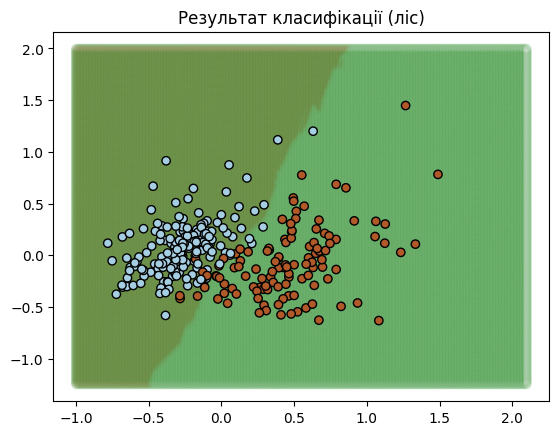

In [44]:
#  за допомогою PCA понижуємо розмірність таблиці до 2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)
x_pca_test = pca.transform(X_test)

#  створюємо площину (сітку) майбутнього графіку
plane = []
for i in np.linspace(-1, 2.1, 300):
    for j in np.linspace(-1.25, 2, 300):
        plane.append([i, j])
plane = np.array(plane)

#  підвищуємо до початкової розмірності
pca_inv = pca.inverse_transform(plane)
y_predict = rf_clf.predict(pca_inv)

#  будуємо графік
plt.scatter(plane[:, 0], plane[:, 1], c=y_predict, edgecolors='green', cmap=plt.cm.Pastel1, alpha=0.1)
plt.scatter(x_pca_test[:, 0], x_pca_test[:, 1], c=y_test, edgecolors='black', cmap=plt.cm.Paired)
plt.title('Результат класифікації (ліс)')
plt.show()

<b>Частина 5 - AdaBoost</b>

In [45]:
from sklearn.ensemble import AdaBoostClassifier

#  розділяємо на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=69)

# ініціалізуємо класифікатор на основі дерева рішень
base_classifier = DecisionTreeClassifier(max_depth=1)

# ініціалізація adaboost класифікатора
ada = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Навчання моделі
ada.fit(X_train, y_train)

# Отримуємо передбаченні значення моделі adaboost
y_predict = ada.predict(X_test)

# Отримуємо classification report
print('Звіт класифікації:')
print(classification_report(y_test, y_predict))

# Отримуємо confusion matrix
print('Матриця помилок:')
print(confusion_matrix(y_test, y_predict))


Звіт класифікації:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       170
           1       0.96      0.95      0.95       115

    accuracy                           0.96       285
   macro avg       0.96      0.96      0.96       285
weighted avg       0.96      0.96      0.96       285

Матриця помилок:
[[165   5]
 [  6 109]]
